In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
#!pip install tabulate
from tabulate import tabulate
import os

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This function takes a directory path as input and returns a list of CSV files within that directory.
def find_csv_files(directory):
    csv_files = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(".csv"):
                csv_files.append(os.path.join(root, file))

    return csv_files

In [ ]:
# Provide the directory path where you want to start searching for CSV files
starting_directory = "/content/drive/MyDrive/BoT-IoT Dataset/DoS"

csv_files = find_csv_files(starting_directory)

for csv_file in csv_files:
    print(csv_file.split("/")[-1], "\t\t", csv_file)

DoS_UDP[1].csv 		 /content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_UDP/DoS_UDP[1].csv
DoS_UDP[2].csv 		 /content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_UDP/DoS_UDP[2].csv
DoS_UDP[3].csv 		 /content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_UDP/DoS_UDP[3].csv
DoS_HTTP[1].csv 		 /content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_HTTP/DoS_HTTP[1].csv
DoS_TCP[2].csv 		 /content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_TCP/DoS_TCP[2].csv
DoS_TCP[3].csv 		 /content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_TCP/DoS_TCP[3].csv
DoS_TCP[1].csv 		 /content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_TCP/DoS_TCP[1].csv


In [ ]:
df_dos_UDP = pd.read_csv("/content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_UDP/DoS_UDP[1].csv") # read the UDP data
df_dos_HTTP = pd.read_csv("/content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_HTTP/DoS_HTTP[1].csv") # read the HTTP data
df_dos_TCP = pd.read_csv("/content/drive/MyDrive/BoT-IoT Dataset/DoS/DoS_TCP/DoS_TCP[1].csv") # read the TCP data

In [ ]:
df_dos_UDP.head() # lets show the first 5 rows of dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Fwd_IAT_Std,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.100.150-192.168.100.3-59493-80-17,192.168.100.150,59493,192.168.100.3,80,17,04/06/2018 12:02:09 AM,6984078,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.572731,2328026.0,113045.485142,2458101.0,2253520.0,4730558.0,2365279.0,0.0,2458101.0,2272457.0,0.0,131270.131287,0.0,0.0,0.0,0,0,0,0,24,8,0.429548,0.143183,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,-1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_UDP
1,192.168.100.149-192.168.100.5-43240-80-17,192.168.100.149,43240,192.168.100.5,80,17,04/06/2018 12:02:12 AM,4300052,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465111,4300052.0,0.000000,4300052.0,4300052.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,8,8,0.232555,0.232555,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,-1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_UDP
2,192.168.100.150-192.168.100.3-43631-80-17,192.168.100.150,43631,192.168.100.3,80,17,04/06/2018 12:02:11 AM,4730646,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634163,2365323.0,120708.784403,2450677.0,2279969.0,2450677.0,2450677.0,0.0,2450677.0,2450677.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,16,8,0.422775,0.211388,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,1,0,-1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_UDP
3,192.168.100.149-192.168.100.5-33474-80-17,192.168.100.149,33474,192.168.100.5,80,17,04/06/2018 12:02:12 AM,4322571,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462688,4322571.0,0.000000,4322571.0,4322571.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,8,8,0.231344,0.231344,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,-1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_UDP
4,192.168.100.148-192.168.100.6-25941-80-17,192.168.100.148,25941,192.168.100.6,80,17,04/06/2018 12:02:10 AM,7322549,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409693,3661274.5,133420.443008,3755617.0,3566932.0,3755617.0,3755617.0,0.0,3755617.0,3755617.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,16,8,0.273129,0.136564,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,1,0,-1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_UDP


In [ ]:
df_dos_HTTP.head() # lets show the first 5 rows of dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Fwd_IAT_Std,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,309.0,494.0,309.0,0.0,103.000000,178.401233,494.0,0.0,98.8,220.923516,160.479704,1.598802,714821.142857,1.890821e+06,5002799.0,20.0,869.0,434.5,1250937.00,849.0,20.0,5003748.0,586.191522,2.501255e+06,5002820.0,38.0,0,0,0,0,96,176,0.599551,0.999251,0.0,494.0,89.222222,182.986186,33483.944444,0,1,0,0,0,0,0,0,1.0,100.375,103.000000,98.8,0,0,0,0,0,0,3,309,5,494,-1,235,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,390.0,494.0,390.0,0.0,130.000000,225.166605,494.0,0.0,98.8,220.923516,176.651118,1.598653,714887.714286,1.890988e+06,5003245.0,30.0,767.0,383.5,1251053.50,730.0,37.0,5004214.0,490.024999,2.501481e+06,5003275.0,140.0,0,0,0,0,96,176,0.599495,0.999158,0.0,494.0,98.222222,196.630223,38663.444444,0,1,0,0,0,0,0,0,1.0,110.500,130.000000,98.8,0,0,0,0,0,0,3,390,5,494,-1,235,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,311.0,494.0,311.0,0.0,103.666667,179.555934,494.0,0.0,98.8,220.923516,160.887540,1.598882,714785.000000,1.890694e+06,5002475.0,26.0,930.0,465.0,1250873.75,786.0,144.0,5003495.0,453.962554,2.501120e+06,5002553.0,50.0,0,0,0,0,96,176,0.599581,0.999301,0.0,494.0,89.444444,183.287418,33594.277778,0,1,0,0,0,0,0,0,1.0,100.625,103.666667,98.8,0,0,0,0,0,0,3,311,5,494,-1,235,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,410.0,494.0,410.0,0.0,136.666667,236.713610,494.0,0.0,98.8,220.923516,180.683820,1.598972,714745.000000,1.890626e+06,5002282.0,14.0,876.0,438.0,1250803.75,862.0,14.0,5003215.0,599.626550,2.501006e+06,5002312.0,23.0,0,0,0,0,96,176,0.599614,0.999357,0.0,494.0,100.444444,200.416511,40166.777778,0,1,0,0,0,0,0,0,1.0,113.000,136.666667,98.8,0,0,0,0,0,0,3,410,5,494,-1,235,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,399.0,494.0,399.0,0.0,133.000000,230.362757,494.0,0.0,98.8,220.923516,178.493796,1.599049,714710.714286,1.890503e+06,5001968.0,15.0,943.0,471.5,1250743.75,927.0,16.0,5002975.0,644.174278,2.500826e+06,5001983.0,24.0,0,0,0,0,96,176,0.599643,0.999405,0.0,494.0,99.222222,198.315265,39328.944444,0,1,0,0,0,0,0,0,1.0,111.625,133.000000,98.8,0,0,0,0,0,0,3,399,5,494,-1,235,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP


In [ ]:
df_dos_TCP.head() # lets show the first 5 rows of dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Fwd_IAT_Std,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.100.3-192.168.100.7-565-365-17,192.168.100.7,365,192.168.100.3,565,17,03/06/2018 11:49:15 PM,45416824,1953,1,35154.0,18.0,18.0,18.0,18.000000,0.000000,18.0,18.0,18.000000,0.000000,774.426675,43.023704,23254.902202,4746.594393,30588.0,2174.0,45391964.0,23254.079918,0.000000,30588.0,2174.0,0.0,4747.671549,0.000000,0.0,0.0,0,0,0,0,15624,8,43.001686,0.022018,18.0,18.0,18.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,18.009212,18.000000,18.000000,0,0,0,0,0,0,1953,35154,1,18,-1,-1,1953,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal,Normal
1,192.168.100.3-192.168.100.55-80-8080-6,192.168.100.55,8080,192.168.100.3,80,6,03/06/2018 11:49:15 PM,45404403,3631,3633,3457243.0,3229918.0,1443.0,398.0,952.146241,292.257967,1456.0,382.0,889.049821,299.874696,147280.011588,159.984484,6251.466749,6132.028788,24947.0,2.0,45391970.0,12504.674931,12500.558370,28901.0,2046.0,45402028.0,1981.561694,1612.000430,25051.0,12.0,0,0,0,0,72620,72660,79.970218,80.014266,382.0,1456.0,920.635650,297.753465,88657.126179,0,0,0,0,0,0,0,0,1.0,920.762390,952.146241,889.049821,0,0,0,0,0,0,3631,3457243,3633,3229918,-1,1024,3631,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal,Normal
2,192.168.100.5-192.168.100.46-80-80-17,192.168.100.46,80,192.168.100.5,80,17,03/06/2018 11:49:15 PM,45404403,3631,1,3328751.0,995.0,1455.0,416.0,916.758744,289.801919,995.0,995.0,995.000000,0.000000,73335.310675,79.992242,12504.655191,2103.943381,28902.0,2045.0,45391972.0,12504.675482,0.000000,28902.0,2045.0,0.0,2104.232885,0.000000,0.0,0.0,0,0,0,0,29048,8,79.970218,0.022024,416.0,1455.0,916.801817,289.727931,83942.274039,0,0,0,0,0,0,0,0,0.0,917.054240,916.758744,995.000000,0,0,0,0,0,0,3631,3328751,1,995,-1,-1,3631,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal,Normal
3,192.168.100.3-192.168.100.5-0-0-6,192.168.100.5,0,192.168.100.3,0,6,03/06/2018 11:49:15 PM,45416824,2179,1,1431599.0,59.0,1432.0,59.0,656.998164,358.199009,59.0,59.0,59.000000,0.000000,31522.635753,47.999834,20842.966498,5848.424175,30751.0,7060.0,45391965.0,20841.122590,0.000000,30751.0,7060.0,0.0,5849.133687,0.000000,0.0,0.0,0,0,0,0,43580,20,47.977815,0.022018,59.0,1432.0,656.449794,358.492108,128516.591630,0,0,0,0,0,0,0,0,0.0,656.750917,656.998164,59.000000,0,0,0,0,0,0,2179,1431599,1,59,-1,1024,2179,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal,Normal,Normal
4,192.168.100.5-192.168.100.46-80-3456-17,192.168.100.5,80,192.168.100.46,3456,17,03/06/2018 11:49:15 PM,45416823,3632,3633,3463842.0,3297497.0,1472.0,394.0,953.700991,324.134514,1467.0,422.0,907.651252,314.939815,148873.006815,159.962752,6252.315942,6219.400800,25929.0,5.0,45404394.0,12504.652713,12503.973293,28895.0,2041.0,45414431.0,2047.023429,1827.229896,25935.0,2049.0,0,0,0,0,29056,29064,79.970367,79.992385,394.0,1472.0,930.631847,320.373279,102639.038154,0,0,0,0,0,0,0,0,1.0,930.759945,953.700991,907.651252,0,0,0,0,0,0,3632,3463842,3633,3297497,-1

In [ ]:
df_dos_TCP.shape, df_dos_UDP.shape, df_dos_HTTP.shape # check the shape of dataset

((1729014, 86), (1544070, 86), (52466, 86))

In [ ]:
df_dos_UDP['Sub_Cat'].value_counts() # check the sub cat value counts of UDP

DoS_UDP    1543740
Normal         330
Name: Sub_Cat, dtype: int64

In [ ]:
df_dos_TCP['Sub_Cat'].value_counts() # check the sub cat value counts of TCP

DoS_TCP    1725909
Normal        3105
Name: Sub_Cat, dtype: int64

In [ ]:
df_dos_HTTP['Sub_Cat'].value_counts() # check the sub cat value counts of HTTP

DoS_HTTP    50766
Normal       1700
Name: Sub_Cat, dtype: int64

In [ ]:
# only get the Dos Attacks
nrows = 52466  # Define the maximum number of rows to retain.

# Filter the 'df_dos_TCP' DataFrame to include only rows with the 'Sub_Cat' column value 'DoS_TCP' and limit the rows to 'nrows'.
df_dos_TCP = df_dos_TCP[df_dos_TCP['Sub_Cat'] == 'DoS_TCP'][:nrows]

# Filter the 'df_dos_UDP' DataFrame to include only rows with the 'Sub_Cat' column value 'DoS_UDP' and limit the rows to 'nrows'.
df_dos_UDP = df_dos_UDP[df_dos_UDP['Sub_Cat'] == 'DoS_UDP'][:nrows]

# Filter the 'df_dos_HTTP' DataFrame to include only rows with the 'Sub_Cat' column value 'DoS_HTTP' and limit the rows to 'nrows'.
df_dos_HTTP = df_dos_HTTP[df_dos_HTTP['Sub_Cat'] == 'DoS_HTTP'][:nrows]

In [ ]:
df_dos_TCP.shape, df_dos_UDP.shape, df_dos_HTTP.shape # now again the check the shape

((52466, 86), (52466, 86), (50766, 86))

In [ ]:
# remove the irrelevent features from all dataset
df_dos_TCP_ = df_dos_TCP.drop(['Timestamp','Label', 'Cat', 'Flow_ID'], axis = 1)
df_dos_UDP_ = df_dos_UDP.drop(['Timestamp','Label', 'Cat', 'Flow_ID'], axis = 1)
df_dos_HTTP_ = df_dos_HTTP.drop(['Timestamp','Label', 'Cat', 'Flow_ID'], axis = 1)

In [ ]:
df_dos_TCP_.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Fwd_IAT_Std,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Sub_Cat
8,192.168.100.150,56968,192.168.100.7,80,6,7545059,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.507414,0.265074,7545059.0,0.000000,7545059.0,7545059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,20,20,0.132537,0.132537,100.0,100.0,100.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1.0,150.000000,100.0,100.0,0,0,0,0,0,0,1,100,1,100,-1,512,1,0,0.0,0.0,0.0,0.0,7545059.0,0.0,7545059.0,7545059.0,DoS_TCP
9,192.168.100.150,51091,192.168.100.7,80,6,7631730,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.206378,0.262064,7631730.0,0.000000,7631730.0,7631730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,20,20,0.131032,0.131032,100.0,100.0,100.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1.0,150.000000,100.0,100.0,0,0,0,0,0,0,1,100,1,100,-1,512,1,0,0.0,0.0,0.0,0.0,7631730.0,0.0,7631730.0,7631730.0,DoS_TCP
10,192.168.100.150,16018,192.168.100.7,80,6,7389939,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,27.063823,0.270638,7389939.0,0.000000,7389939.0,7389939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,20,20,0.135319,0.135319,100.0,100.0,100.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1.0,150.000000,100.0,100.0,0,0,0,0,0,0,1,100,1,100,-1,512,1,0,0.0,0.0,0.0,0.0,7389939.0,0.0,7389939.0,7389939.0,DoS_TCP
11,192.168.100.148,36074,192.168.100.3,80,6,131015,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,763.271381,22.898141,65507.5,47714.858488,99247.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,31768.0,0,0,0,0,20,44,7.632714,15.265428,0.0,100.0,50.0,57.735027,3333.333333,0,1,0,0,0,0,0,0,2.0,66.666667,0.0,50.0,0,0,0,0,0,0,1,0,2,100,-1,29200,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_TCP
12,192.168.100.148,47752,192.168.100.3,80,6,188027,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,531.838513,15.955155,94013.5,83401.123521,152987.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,35040.0,0,0,0,0,20,44,5.318385,10.636770,0.0,100.0,50.0,57.735027,3333.333333,0,1,0,0,0,0,0,0,2.0,66.666667,0.0,50.0,0,0,0,0,0,0,1,0,2,100,-1,29200,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_TCP


In [ ]:
# rename the column name and change the class label from all dataset
df_dos_TCP_  = df_dos_TCP_.rename(columns={'Sub_Cat':'class'})
df_dos_TCP_['class']  = df_dos_TCP_['class'].map({'DoS_TCP':'TCP_FLOOD'})

df_dos_UDP_  = df_dos_UDP_.rename(columns={'Sub_Cat':'class'})
df_dos_UDP_['class']  = df_dos_UDP_['class'].map({'DoS_UDP':'UDP_FLOOD'})

df_dos_HTTP_  = df_dos_HTTP_.rename(columns={'Sub_Cat':'class'})
df_dos_HTTP_['class']  = df_dos_HTTP_['class'].map({'DoS_HTTP':'HTTP_FLOOD'})


In [ ]:
df = pd.concat([df_dos_TCP_, df_dos_UDP_, df_dos_HTTP_]) # concate all the dataset into one dataset
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Fwd_IAT_Std,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,class
8,192.168.100.150,56968,192.168.100.7,80,6,7545059,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.507414,0.265074,7545059.0,0.000000,7545059.0,7545059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,20,20,0.132537,0.132537,100.0,100.0,100.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1.0,150.000000,100.0,100.0,0,0,0,0,0,0,1,100,1,100,-1,512,1,0,0.0,0.0,0.0,0.0,7545059.0,0.0,7545059.0,7545059.0,TCP_FLOOD
9,192.168.100.150,51091,192.168.100.7,80,6,7631730,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.206378,0.262064,7631730.0,0.000000,7631730.0,7631730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,20,20,0.131032,0.131032,100.0,100.0,100.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1.0,150.000000,100.0,100.0,0,0,0,0,0,0,1,100,1,100,-1,512,1,0,0.0,0.0,0.0,0.0,7631730.0,0.0,7631730.0,7631730.0,TCP_FLOOD
10,192.168.100.150,16018,192.168.100.7,80,6,7389939,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,27.063823,0.270638,7389939.0,0.000000,7389939.0,7389939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,20,20,0.135319,0.135319,100.0,100.0,100.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1.0,150.000000,100.0,100.0,0,0,0,0,0,0,1,100,1,100,-1,512,1,0,0.0,0.0,0.0,0.0,7389939.0,0.0,7389939.0,7389939.0,TCP_FLOOD
11,192.168.100.148,36074,192.168.100.3,80,6,131015,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,763.271381,22.898141,65507.5,47714.858488,99247.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,31768.0,0,0,0,0,20,44,7.632714,15.265428,0.0,100.0,50.0,57.735027,3333.333333,0,1,0,0,0,0,0,0,2.0,66.666667,0.0,50.0,0,0,0,0,0,0,1,0,2,100,-1,29200,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCP_FLOOD
12,192.168.100.148,47752,192.168.100.3,80,6,188027,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,531.838513,15.955155,94013.5,83401.123521,152987.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,35040.0,0,0,0,0,20,44,5.318385,10.636770,0.0,100.0,50.0,57.735027,3333.333333,0,1,0,0,0,0,0,0,2.0,66.666667,0.0,50.0,0,0,0,0,0,0,1,0,2,100,-1,29200,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCP_FLOOD


In [ ]:
# lets try to check the general information of all columns in dataset
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155698 entries, 8 to 52460
Data columns (total 82 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_IP             155698 non-null  object 
 1   Src_Port           155698 non-null  int64  
 2   Dst_IP             155698 non-null  object 
 3   Dst_Port           155698 non-null  int64  
 4   Protocol           155698 non-null  int64  
 5   Flow_Duration      155698 non-null  int64  
 6   Tot_Fwd_Pkts       155698 non-null  int64  
 7   Tot_Bwd_Pkts       155698 non-null  int64  
 8   TotLen_Fwd_Pkts    155698 non-null  float64
 9   TotLen_Bwd_Pkts    155698 non-null  float64
 10  Fwd_Pkt_Len_Max    155698 non-null  float64
 11  Fwd_Pkt_Len_Min    155698 non-null  float64
 12  Fwd_Pkt_Len_Mean   155698 non-null  float64
 13  Fwd_Pkt_Len_Std    155698 non-null  float64
 14  Bwd_Pkt_Len_Max    155698 non-null  float64
 15  Bwd_Pkt_Len_Min    155698 non-null  float64
 16  Bwd

* The info() function provides essential information about the DataFrame, including the data types, non-null counts, and memory usage of each column. Setting verbose to True enables a detailed output with column-wise information. This summary is useful for understanding the composition and structure of the dataset, identifying any missing values, and gauging memory usage.

In [ ]:
# lets try to check the total missing values in the dataset
print("Total Missing Values : ", df.isnull().sum().sum())
print("Missing Value feature: ", df.columns[df.isnull().any()])

# lets drop the all null occurence
df = df.dropna()

# lets again check the missing values
print("After Removing Total Missing Values : ", df.isnull().sum().sum())

Total Missing Values :  3
Missing Value feature:  Index(['Flow_Byts/s'], dtype='object')
After Removing Total Missing Values :  0


In [ ]:
def class_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    colors = ['red', 'green', 'blue', 'magenta', 'orange', 'purple', 'cyan', 'yellow', 'brown']
    ax = df_final[col].value_counts().plot(kind='bar', color=colors)

    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Frequency of Class', fontsize=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title(f'Frequency Distribution of Class', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01), size=15)

    plt.subplot(1, 2, 2)

    df_final[col].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, colors=colors,
                                          textprops={'fontsize': 15, 'color': 'white'})
    plt.ylabel('Target', fontsize=16)
    plt.title(f'Proportional Distribution of Class', fontsize=18)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

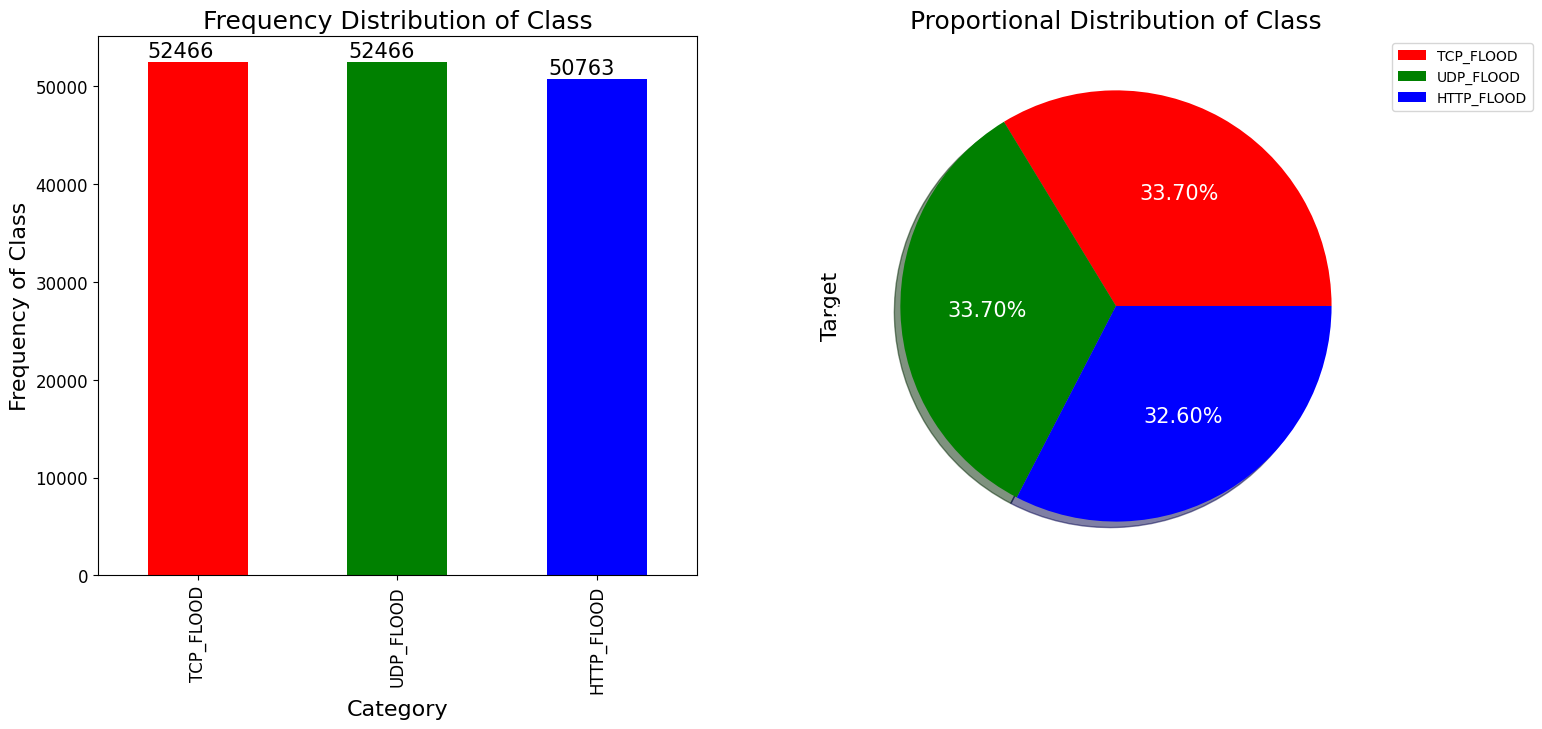

In [ ]:
class_distribution(df, 'class')

* Evidently, the dataset exhibits a balanced distribution across its categories.
* The advantage of a balanced dataset is that accuracy evaluation can provide reliable insights. In cases of imbalanced datasets, additional metrics become necessary for accurate assessment.
* To comprehensively assess model performance, we will employ various performance metrics on the testing data, including Precision, Recall, F1-score, and AUC score.
* When dealing with imbalanced data, metrics like ROC/AUC demonstrate enhanced efficacy in evaluating model performance.

In [ ]:
# lets remove the features which has only one category value greater 97% because that are not good for model predictiom
stats = []
for col in df.columns[:-1]:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
df_ = stats_df.sort_values('% MissingValues', ascending=False)
one_category_value = df_[df_['% highOneCategoricalValues']>=97]
print(tabulate(one_category_value, headers = 'keys', tablefmt = 'psql'))

+----+-------------------+-----------------+-------------------+------------------------------+---------+
|    | Feature           |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+-------------------+-----------------+-------------------+------------------------------+---------|
| 59 | Fwd_Byts/b_Avg    |               1 |                 0 |                     100      | int64   |
| 54 | ECE_Flag_Cnt      |               1 |                 0 |                     100      | int64   |
| 53 | CWE_Flag_Count    |               1 |                 0 |                     100      | int64   |
| 52 | URG_Flag_Cnt      |               1 |                 0 |                     100      | int64   |
| 50 | PSH_Flag_Cnt      |               2 |                 0 |                      99.9827 | int64   |
| 49 | RST_Flag_Cnt      |               2 |                 0 |                      99.9191 | int64   |
| 47 | FIN_Flag_Cnt      |               2 |  

In [ ]:
1000 - 0:990 1:10

In [ ]:
drop_features = one_category_value['Feature'].tolist()
drop_features

['Fwd_Byts/b_Avg',
 'ECE_Flag_Cnt',
 'CWE_Flag_Count',
 'URG_Flag_Cnt',
 'PSH_Flag_Cnt',
 'RST_Flag_Cnt',
 'FIN_Flag_Cnt',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Std',
 'Active_Std',
 'Bwd_Pkts/b_Avg',
 'Init_Fwd_Win_Byts',
 'Bwd_Blk_Rate_Avg',
 'Dst_Port',
 'Bwd_URG_Flags',
 'Fwd_URG_Flags',
 'Bwd_PSH_Flags',
 'Fwd_PSH_Flags']

In [ ]:
# lets drop the features
df = df.drop(drop_features, axis=1)

In [ ]:
df.head()

,Src_IP,Src_Port,Dst_IP,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Fwd_IAT_Std,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,SYN_Flag_Cnt,ACK_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Max,Active_Min,Idle_Mean,Idle_Max,Idle_Min,class
8,192.168.100.150,56968,192.168.100.7,6,7545059,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.507414,0.265074,7545059.0,0.000000,7545059.0,7545059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,20,0.132537,0.132537,100.0,100.0,100.0,0.000000,0.000000,1,0,1.0,150.000000,100.0,100.0,1,100,1,100,512,1,0.0,0.0,0.0,7545059.0,7545059.0,7545059.0,TCP_FLOOD
9,192.168.100.150,51091,192.168.100.7,6,7631730,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.206378,0.262064,7631730.0,0.000000,7631730.0,7631730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,20,0.131032,0.131032,100.0,100.0,100.0,0.000000,0.000000,1,0,1.0,150.000000,100.0,100.0,1,100,1,100,512,1,0.0,0.0,0.0,7631730.0,7631730.0,7631730.0,TCP_FLOOD
10,192.168.100.150,16018,192.168.100.7,6,7389939,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,27.063823,0.270638,7389939.0,0.000000,7389939.0,7389939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,20,0.135319,0.135319,100.0,100.0,100.0,0.000000,0.000000,1,0,1.0,150.000000,100.0,100.0,1,100,1,100,512,1,0.0,0.0,0.0,7389939.0,7389939.0,7389939.0,TCP_FLOOD
11,192.168.100.148,36074,192.168.100.3,6,131015,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,763.271381,22.898141,65507.5,47714.858488,99247.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,31768.0,20,44,7.632714,15.265428,0.0,100.0,50.0,57.735027,3333.333333,1,0,2.0,66.666667,0.0,50.0,1,0,2,100,29200,0,0.0,0.0,0.0,0.0,0.0,0.0,TCP_FLOOD
12,192.168.100.148,47752,192.168.100.3,6,188027,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,531.838513,15.955155,94013.5,83401.123521,152987.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,35040.0,20,44,5.318385,10.636770,0.0,100.0,50.0,57.735027,3333.333333,1,0,2.0,66.666667,0.0,50.0,1,0,2,100,29200,0,0.0,0.0,0.0,0.0,0.0,0.0,TCP_FLOOD


## **Label Encoding**

* Label encoding is a pivotal data preprocessing technique that transforms categorical data into a numerical format, allowing machine learning algorithms to effectively process and analyze such information. In this process, each unique category within a categorical feature is assigned a corresponding integer label. Label encoding is particularly useful for algorithms that require numerical inputs, as it converts textual or categorical information into a structured numerical representation.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over categorical columns and apply label encoding
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Src_IP,Src_Port,Dst_IP,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Fwd_IAT_Std,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,SYN_Flag_Cnt,ACK_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Max,Active_Min,Idle_Mean,Idle_Max,Idle_Min,class
8,3,56968,5,6,7545059,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.507414,0.265074,7545059.0,0.000000,7545059.0,7545059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,20,0.132537,0.132537,100.0,100.0,100.0,0.000000,0.000000,1,0,1.0,150.000000,100.0,100.0,1,100,1,100,512,1,0.0,0.0,0.0,7545059.0,7545059.0,7545059.0,1
9,3,51091,5,6,7631730,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,26.206378,0.262064,7631730.0,0.000000,7631730.0,7631730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,20,0.131032,0.131032,100.0,100.0,100.0,0.000000,0.000000,1,0,1.0,150.000000,100.0,100.0,1,100,1,100,512,1,0.0,0.0,0.0,7631730.0,7631730.0,7631730.0,1
10,3,16018,5,6,7389939,1,1,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.000000,27.063823,0.270638,7389939.0,0.000000,7389939.0,7389939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,20,0.135319,0.135319,100.0,100.0,100.0,0.000000,0.000000,1,0,1.0,150.000000,100.0,100.0,1,100,1,100,512,1,0.0,0.0,0.0,7389939.0,7389939.0,7389939.0,1
11,1,36074,2,6,131015,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,763.271381,22.898141,65507.5,47714.858488,99247.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,0.0,0.0,31768.0,31768.0,20,44,7.632714,15.265428,0.0,100.0,50.0,57.735027,3333.333333,1,0,2.0,66.666667,0.0,50.0,1,0,2,100,29200,0,0.0,0.0,0.0,0.0,0.0,0.0,1
12,1,47752,2,6,188027,1,2,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,50.0,70.710678,531.838513,15.955155,94013.5,83401.123521,152987.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,0.0,0.0,35040.0,35040.0,20,44,5.318385,10.636770,0.0,100.0,50.0,57.735027,3333.333333,1,0,2.0,66.666667,0.0,50.0,1,0,2,100,29200,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
label_encoder.classes_

array(['HTTP_FLOOD', 'TCP_FLOOD', 'UDP_FLOOD'], dtype=object)

In [ ]:
import time

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#import for preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler



# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
# lets extract the dependent and independent features
X = df.drop('class', axis=1)
y = df['class']

## **Split the Data**

* Subsequently, the data set was divided into training and test sets in a ratio of 80:20. This common practice ensures that a substantial portion (80%) of the data is used to train the machine learning model, while the remaining portion (20%) is reserved for evaluating its performance. This distribution helps in assessing the ability of the model to generalize to unseen data. By following this widely recognized division, the study maintains a rigorous approach to model evaluation and validation, which contributes to the reliability of the results obtained.

In [ ]:
# lets split the dataset stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# lets try to check the shape of training,testing
print("training shape :",X_train.shape)
print("testing shape :", X_test.shape)

training shape : (124556, 60)
testing shape : (31139, 60)


## **Normalize the Data**

* After the dataset partition, the next step involved normalizing the data using the Min-Max scaling technique. Min-Max scaling transforms numerical features to a common range, typically between 0 and 1, by subtracting the minimum value and dividing by the range (maximum - minimum). This normalization process ensures that all features contribute equally to the model training, regardless of their original scales. By minimizing the impact of varying scales, the model becomes more robust and accurate in capturing patterns and making predictions. Min-Max scaling is a crucial preprocessing step that enhances the performance and convergence of machine learning algorithms.

In [ ]:
'''
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range.
In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

'''

_scaler = MinMaxScaler()

X_train_std = _scaler.fit_transform(X_train)
X_test_std = _scaler.transform(X_test)

## **Feature Selection chi2**

* After feature normalization, feature selection was performed using the SelectKBest method from the sklearn.feature_selection module along with the chi-squared (chi2) metric. The goal of this process was to identify the most important features for modeling. The importance scores of the elements were ranked in descending order to visualize their cumulative impact. A cumulative score plot was created demonstrating how the cumulative feature scores contribute to the overall importance.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [ ]:
features = SelectKBest(score_func=chi2, k=X_train_std.shape[1])

# fit features to the training dataset
fit = features.fit(X_train_std, y_train)

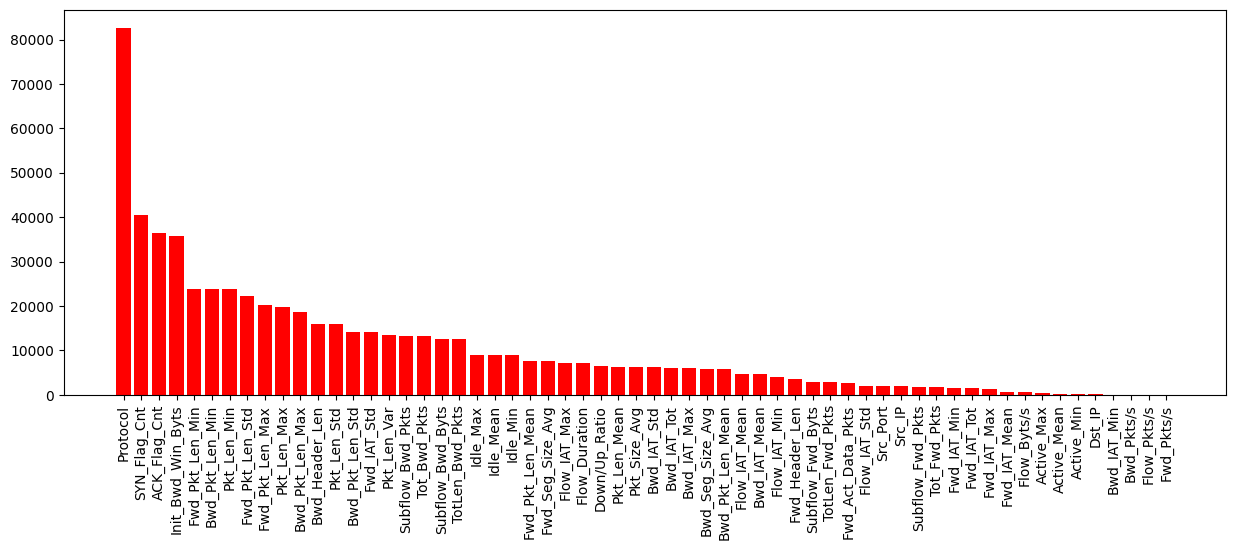

In [ ]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]

# To get feature names
features_ = []
for i in range(len(X_train.columns.tolist())):
    features_.append(X_train.columns[indices[i]])

# Now plot
plt.figure(figsize=(15,5))
plt.bar(features_, fit.scores_[indices], color='r', align='center')
plt.xticks(rotation=90)
plt.show()

In [ ]:
A -> 0.23
B -> 0.15
0.23+0.15

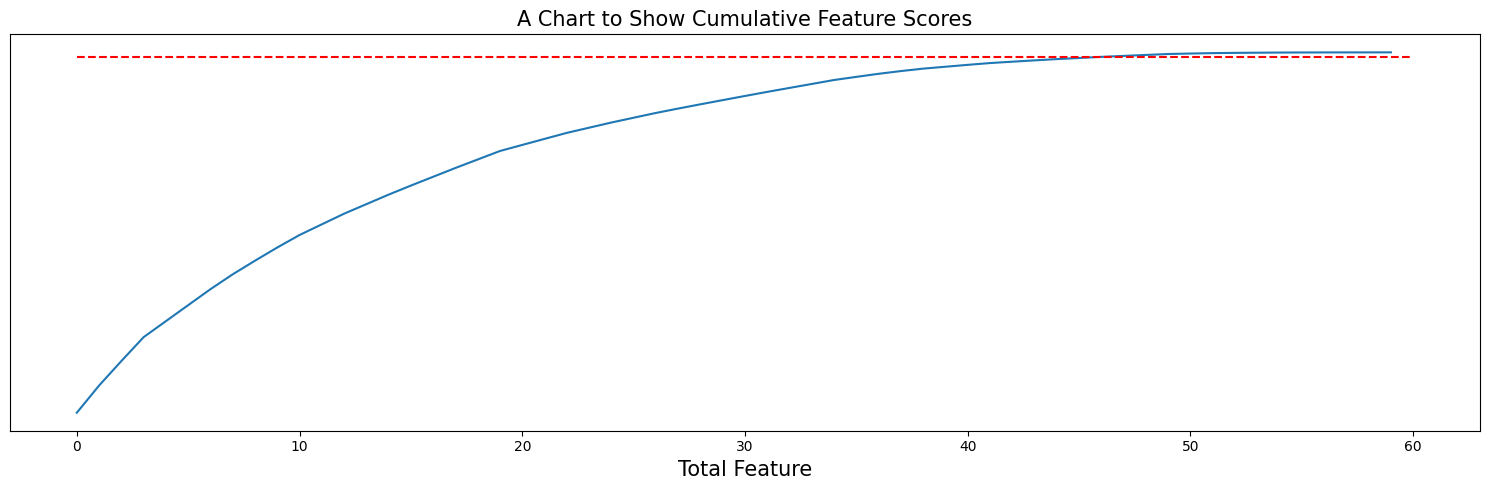

Total selected features: 47


In [ ]:
# sort the features by importance score
feature_importances = zip(X_train.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.figure(figsize=(15, 5))
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# plt.vlines(x = value99, ymin=0, max=len(sorted_importances), color = 'r', linestyles = 'dashed')

# plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Total Feature', fontsize=15)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=15)
# plt.figure(figsize=(500,200))
plt.tight_layout()
plt.savefig('cum_features_CHI2.png', dpi=300)
plt.show()

# Print the total selected features
selected_features_count = np.sum(cumulative_importances <= value99)
print("Total selected features:", selected_features_count)


In [ ]:
# lets get the 40 features
features = SelectKBest(score_func=chi2, k=selected_features_count)
fit = features.fit(X_train_std, y_train)
X_train_std = fit.transform(X_train_std)
X_test_std = fit.transform(X_test_std)

In [ ]:
# lets check the 40 features that we will used for train the model
new_features = X_train.columns[features.get_support(indices=True)]
new_features = pd.DataFrame(new_features.tolist(), columns=['Best Features'])
print(tabulate(new_features, headers = 'keys', tablefmt = 'psql'))

+----+-------------------+
|    | Best Features     |
|----+-------------------|
|  0 | Src_IP            |
|  1 | Src_Port          |
|  2 | Protocol          |
|  3 | Flow_Duration     |
|  4 | Tot_Fwd_Pkts      |
|  5 | Tot_Bwd_Pkts      |
|  6 | TotLen_Fwd_Pkts   |
|  7 | TotLen_Bwd_Pkts   |
|  8 | Fwd_Pkt_Len_Max   |
|  9 | Fwd_Pkt_Len_Min   |
| 10 | Fwd_Pkt_Len_Mean  |
| 11 | Fwd_Pkt_Len_Std   |
| 12 | Bwd_Pkt_Len_Max   |
| 13 | Bwd_Pkt_Len_Min   |
| 14 | Bwd_Pkt_Len_Mean  |
| 15 | Bwd_Pkt_Len_Std   |
| 16 | Flow_IAT_Mean     |
| 17 | Flow_IAT_Std      |
| 18 | Flow_IAT_Max      |
| 19 | Flow_IAT_Min      |
| 20 | Bwd_IAT_Mean      |
| 21 | Bwd_IAT_Tot       |
| 22 | Fwd_IAT_Std       |
| 23 | Bwd_IAT_Std       |
| 24 | Bwd_IAT_Max       |
| 25 | Fwd_Header_Len    |
| 26 | Bwd_Header_Len    |
| 27 | Pkt_Len_Min       |
| 28 | Pkt_Len_Max       |
| 29 | Pkt_Len_Mean      |
| 30 | Pkt_Len_Std       |
| 31 | Pkt_Len_Var       |
| 32 | SYN_Flag_Cnt      |
| 33 | ACK_Flag_Cnt      |
|

## **Model Building**

### **Performance Metrics**

Here's an explanation of each performance metric, along with their mathematical formulas including the TP (True Positives), FP (False Positives), TN (True Negatives), and FN (False Negatives):
1. Accuracy:
Accuracy is the ratio of correctly predicted instances (TP and TN) to the total number of instances in the dataset.

          Mathematical Formula:
          Accuracy = (TP + TN) / (TP + TN + FP + FN)

2. Precision:
Precision is the ratio of correctly predicted positive instances (TP) to the total instances predicted as positive (TP and FP).

        Mathematical Formula:
        Precision = TP / (TP + FP)

3. Recall (Sensitivity or True Positive Rate):
Recall is the ratio of correctly predicted positive instances (TP) to the total actual positive instances (TP and FN).

        Mathematical Formula:
        Recall = TP / (TP + FN)

4. F1 Score:
The F1 score is the harmonic mean of precision and recall, emphasizing the balance between them.

        Mathematical Formula:
        F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

5. Classification Report:
A classification report provides a comprehensive overview of various performance metrics including TP, FP, TN, FN, precision, recall, and F1 score for each class.

6. Confusion Matrix:
A confusion matrix is a table that outlines the counts of TP, FP, TN, and FN for each class, facilitating a more detailed understanding of the model's performance.
These metrics, along with TP, FP, TN, and FN, collectively provide insights into the model's accuracy, precision, recall, and F1 score for different classes in classification tasks.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
Classes = label_encoder.classes_

In [ ]:
0.9555

In [ ]:
def results(model_name, y_pred, y_test, y_train,y_pred_train):
    target_names = ["{}".format(Classes[i]) for i in range(len(Classes))] # Define target names for classification report
    accuracy = round(accuracy_score(y_pred, y_test)*100,4)
    train_accuracy = round(accuracy_score(y_pred_train, y_train)*100,4)

    precision = round(precision_score(y_pred, y_test, average='macro')*100,4)
    recall = round(recall_score(y_pred, y_test, average='macro')*100,4)
    f1_scr = round(f1_score(y_pred, y_test, average='macro')*100,4)


    print("\nTraining Accuracy: {}%".format(train_accuracy))
    print("Testing Accuracy: {}%".format(accuracy))

    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print()
    print("Classification Report:")
    print(classification_report(y_pred, y_test, target_names=target_names))
    print()
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(7,5))
    ConfusionMatrixDisplay.from_predictions(y_pred, y_test,
                                            ax=ax,
                                            display_labels=target_names,
                                            xticks_rotation='vertical')
    plt.show()

    return {
        'Model':model_name,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr
    }

In [ ]:
# Train KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [ ]:
# predict the model
y_pred = knn.predict(X_test_std)
y_pred_train = knn.predict(X_train_std)


Training Accuracy: 99.996%
Testing Accuracy: 99.9839%
Precision: 99.9836%
Recall: 99.9841%
F1-Score: 99.9838%

Classification Report:
              precision    recall  f1-score   support

  HTTP_FLOOD       1.00      1.00      1.00     10148
   TCP_FLOOD       1.00      1.00      1.00     10497
   UDP_FLOOD       1.00      1.00      1.00     10494

    accuracy                           1.00     31139
   macro avg       1.00      1.00      1.00     31139
weighted avg       1.00      1.00      1.00     31139


Confusion Matrix:


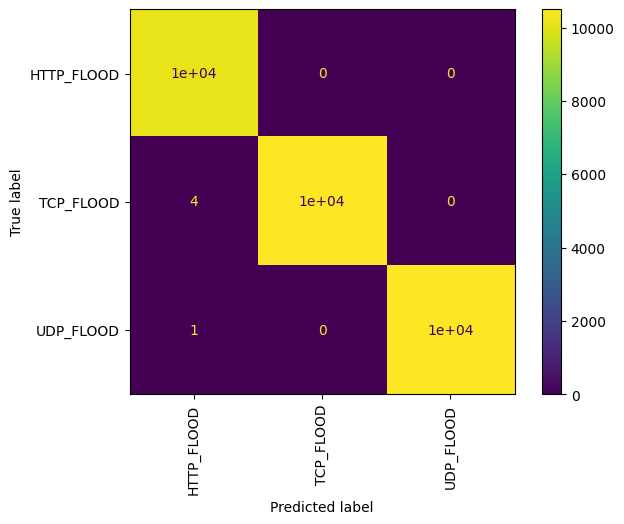

In [ ]:
# check the performance metrics
res = results(knn, y_pred, y_test, y_train, y_pred_train)

In [ ]:
pd.DataFrame([res])

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1
0,KNeighborsClassifier(),99.996,99.9839,99.9836,99.9841,99.9838


* Upon selecting the pertinent features and evaluating their performance using various metrics, the K-Nearest Neighbors (KNN) classification model was employed. KNN is a non-parametric algorithm that categorizes instances by considering the class of their nearest neighbors in the feature space. This intuitive approach allows the model to make predictions based on the majority class among its nearest neighbors. By leveraging the distance metric and adjusting the 'k' value (number of neighbors), the KNN model demonstrates its adaptability to different datasets and classification scenarios.

* The K-Nearest Neighbors (KNN) model exhibits remarkable predictive capabilities, particularly evident in the minimal cases of misclassification, specifically in the TCP and UDP flood categories.